In [ ]:
!pip install validclust  scikit-learn-extra

     |████████████████████████████████| 1.7MB 4.4MB/s 
ERROR: scikit-learn-extra 0.2.0 has requirement scikit-learn>=0.23.0, but you'll have scikit-learn 0.22.2.post1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances

from sklearn_extra.cluster import KMedoids

from validclust import dunn

# https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def print_methods(list1:list, list2:list, titles:list, subtitles:str, k_min=2, k_max=11):
  num_figs = 2

  fig, axs = plt.subplots(1, num_figs, figsize=(12, 6), constrained_layout=True)
  fig.suptitle(subtitles, fontsize = 20)

  axs[0].plot(range(k_min, k_max), list1, '-*')
  axs[0].set_title(titles[0], fontsize = 18)
  axs[0].grid(True)

  axs[1].plot(range(k_min, k_max), list2, '-*')
  axs[1].set_title(titles[1], fontsize = 18)
  axs[1].grid(True)

  plt.show()


def plot_silhouettes(algorithm, num_k, ax):
  visualizer = SilhouetteVisualizer(algorithm, colors='yellowbrick', ax=ax, title="Silhueta com K="+str(num_k))
  visualizer.fit(X_blobs)
  visualizer.ax.set_xlabel("Coeficientes de Silhueta")
  visualizer.ax.set_ylabel("Clusters")
  

## Conjunto de clusters a ser identificados:

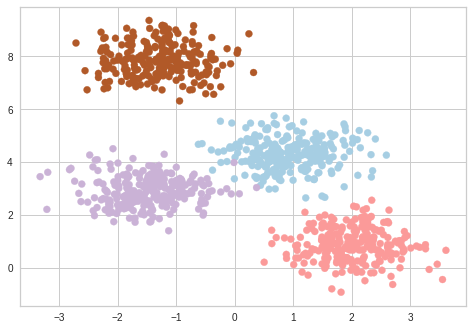

In [ ]:
n_samples = 1000
X_blobs, y_blobs = make_blobs(n_samples=n_samples, centers=4, random_state=0, cluster_std=0.6)
X_blobs = X_blobs[:,:2]

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='Paired')
plt.show()

## Testando o K-means com diferentes números de clusters

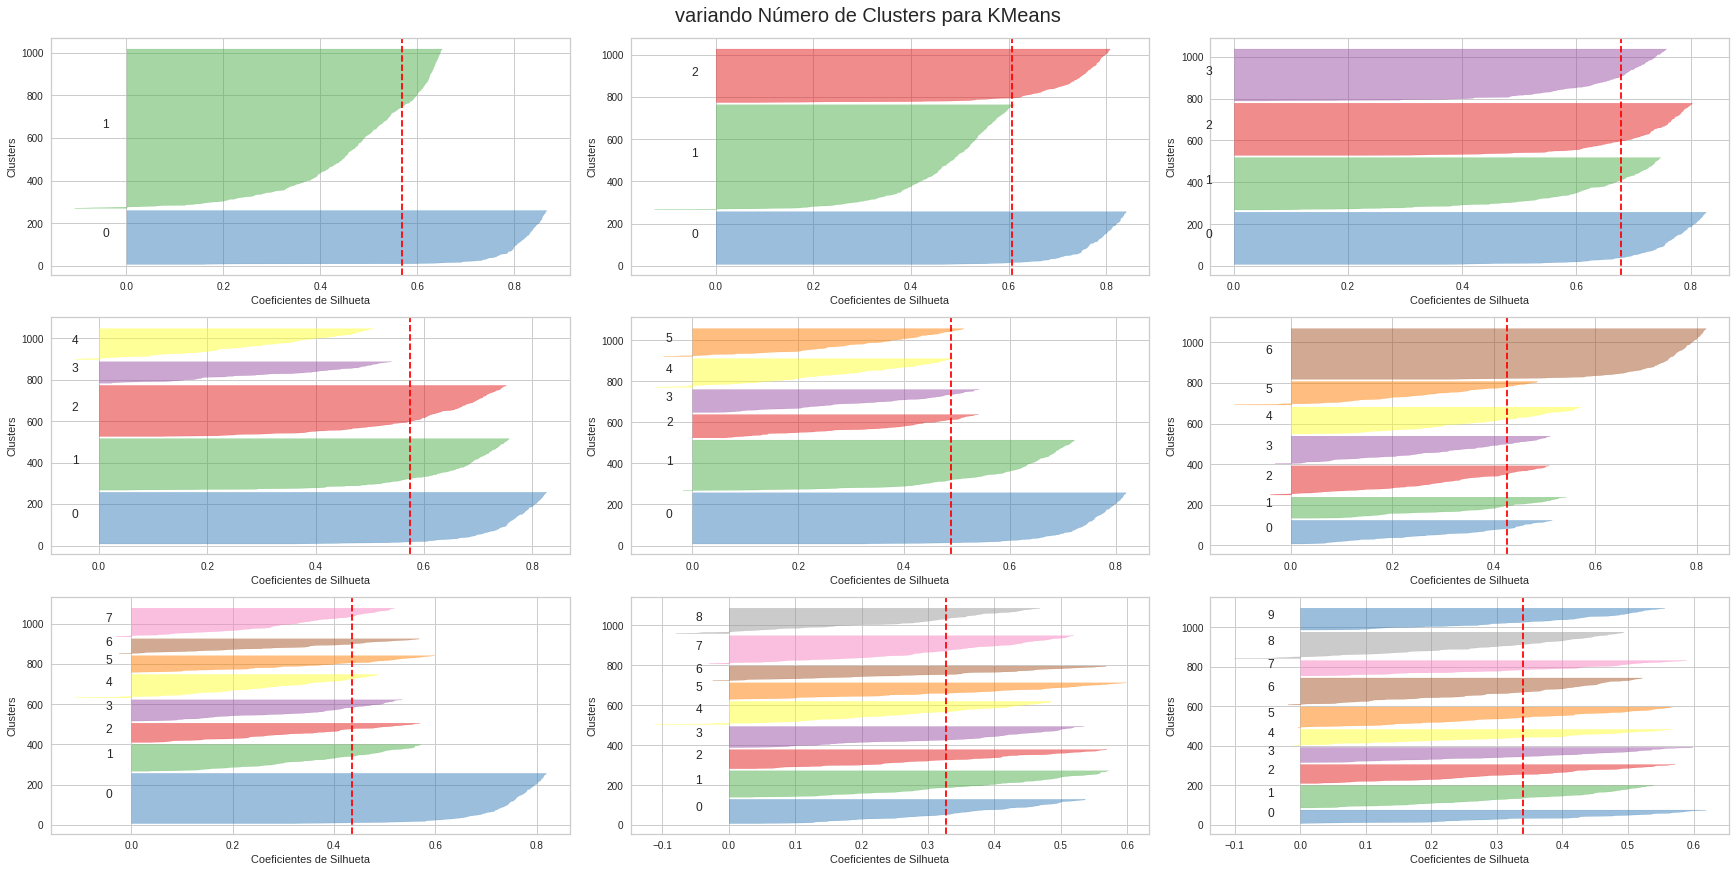

In [ ]:
parametros_kmeans = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

sse = []
silhouette_coefficients = []
dunn_score = []
db_score = []

k_min = 2
k_max = 11

fig, axs = plt.subplots(3, 3, figsize=(24, 12), constrained_layout=True)
fig.suptitle('variando Número de Clusters para KMeans', fontsize = 20)

for k in range(k_min, k_max):
  kmeans = KMeans(n_clusters=k, **parametros_kmeans)
  kmeans.fit(X_blobs)

  #coletando o sse para o método do cotovelo
  sse.append(kmeans.inertia_)

  #coletando os coeficientes de silhueta 
  score = silhouette_score(pd.DataFrame(X_blobs), kmeans.labels_)
  silhouette_coefficients.append(score)

  #coletando índices
  dist = pairwise_distances(X_blobs)
  pred_labels = kmeans.predict(X_blobs)
  dunn_score.append(dunn(dist, pred_labels))
  db_score.append(davies_bouldin_score(dist, pred_labels))

  #plotando os gráficos de silhueta
  plot_silhouettes(kmeans, k, axs[round(k/3)-1][(k-2) % 3])


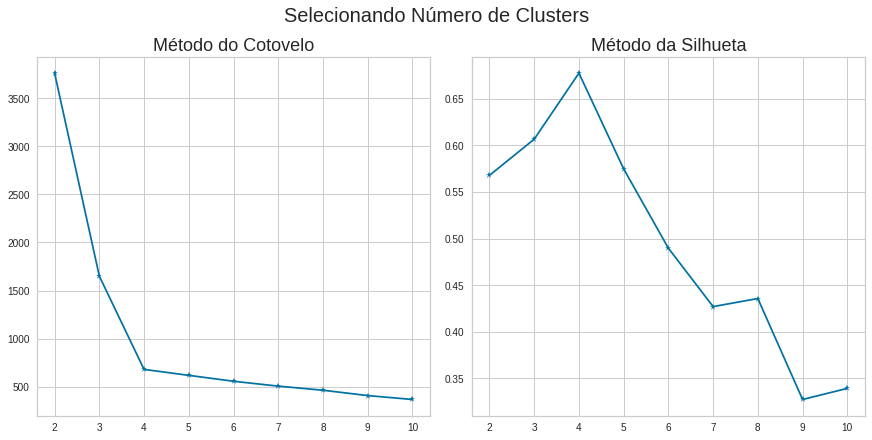

In [ ]:
titles = ['Método do Cotovelo', 'Método da Silhueta']
subtitles = 'Selecionando Número de Clusters'
print_methods(sse, silhouette_coefficients, titles, subtitles, k_min, k_max)

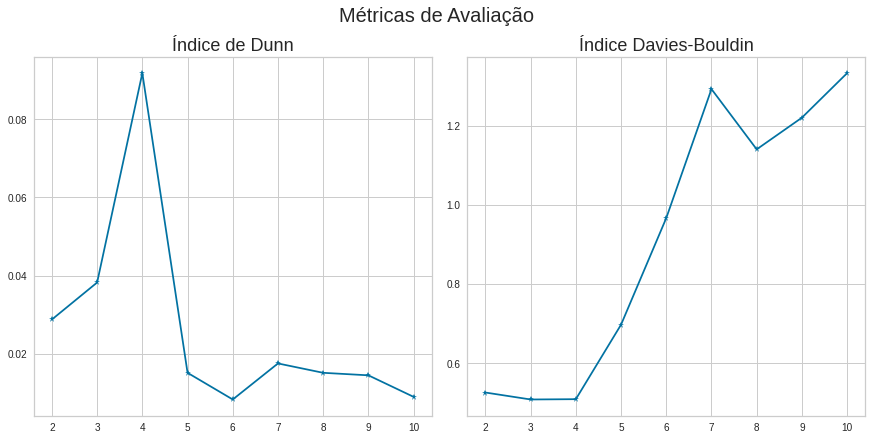

In [ ]:
titles = ['Índice de Dunn', 'Índice Davies-Bouldin']
subtitles = 'Métricas de Avaliação'
print_methods(dunn_score, db_score, titles, subtitles, k_min, k_max)

## Usando Kmedoids

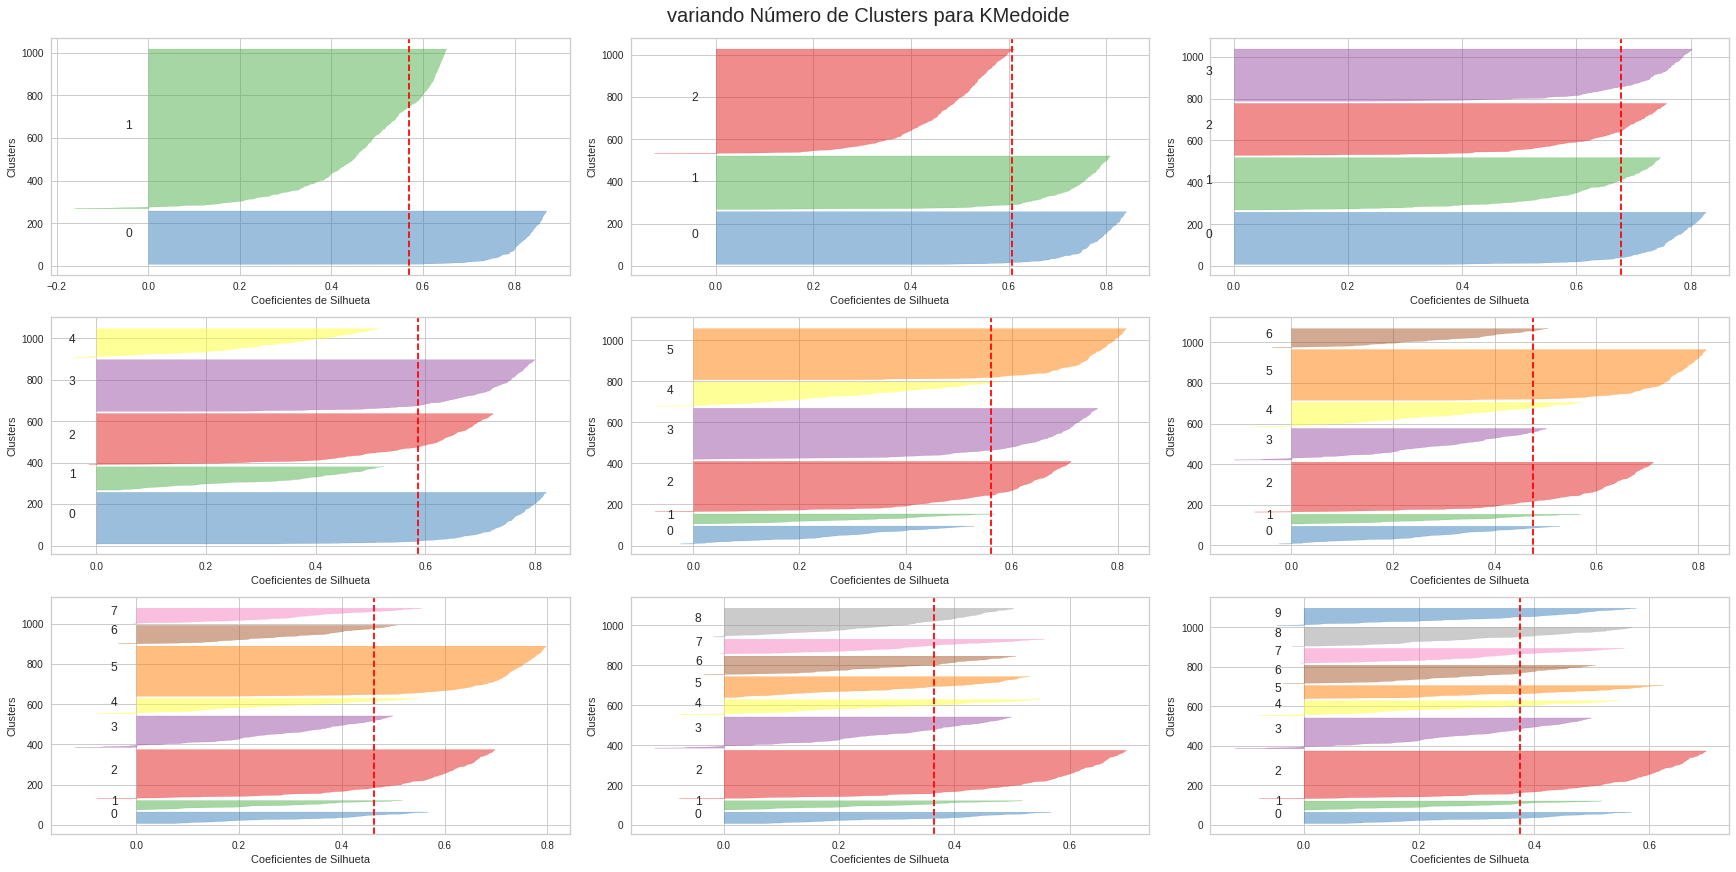

In [ ]:
parametros_kmedoids = {
    "init": "random",
    "metric": "euclidean",
    "max_iter": 300,
    "random_state": 42
}

sse = []
silhouette_coefficients = []
dunn_score = []
db_score = []

k_min = 2
k_max = 11

fig, axs = plt.subplots(3, 3, figsize=(24, 12), constrained_layout=True)
fig.suptitle('variando Número de Clusters para KMedoide', fontsize = 20)

for k in range(k_min, k_max):
  kmedoids = KMedoids(n_clusters=k, **parametros_kmedoids)
  kmedoids.fit(X_blobs)

  #coletando o sse para o método do cotovelo
  sse.append(kmedoids.inertia_)

  #coletando os coeficientes de silhueta 
  score = silhouette_score(pd.DataFrame(X_blobs), kmedoids.labels_)
  silhouette_coefficients.append(score)

  #coletando os índices
  dist = pairwise_distances(X_blobs)
  pred_labels = kmedoids.predict(X_blobs)
  dunn_score.append(dunn(dist, pred_labels))
  db_score.append(davies_bouldin_score(dist, pred_labels))

  #plotando os gráficos de silhueta
  plot_silhouettes(kmedoids, k, axs[round(k/3)-1][(k-2) % 3])

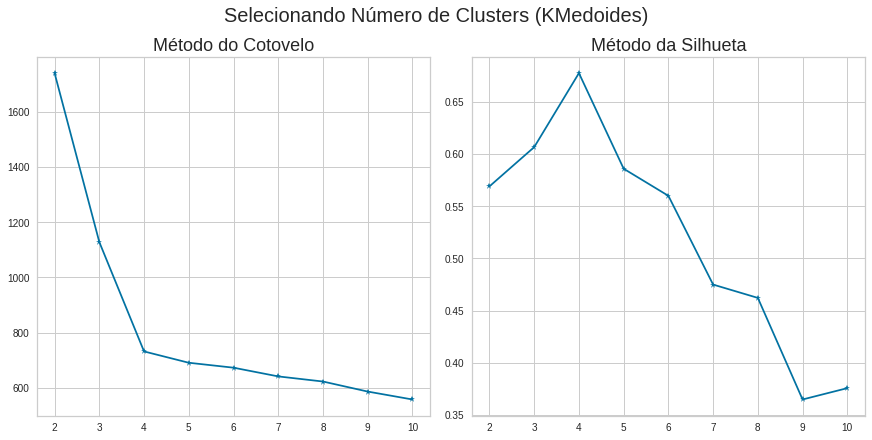

In [ ]:
titles = ['Método do Cotovelo', 'Método da Silhueta']
subtitles = 'Selecionando Número de Clusters (KMedoides)'
print_methods(sse, silhouette_coefficients, titles, subtitles, k_min, k_max)

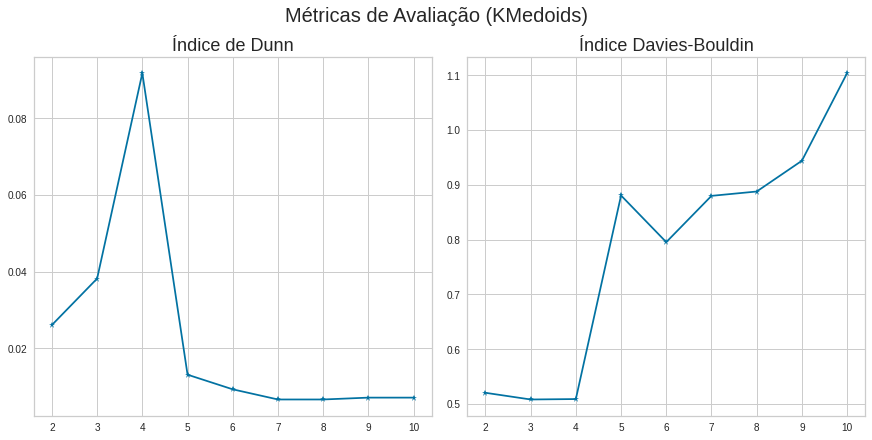

In [ ]:
titles = ['Índice de Dunn', 'Índice Davies-Bouldin']
subtitles = 'Métricas de Avaliação (KMedoids)'
print_methods(dunn_score, db_score, titles, subtitles, k_min, k_max)

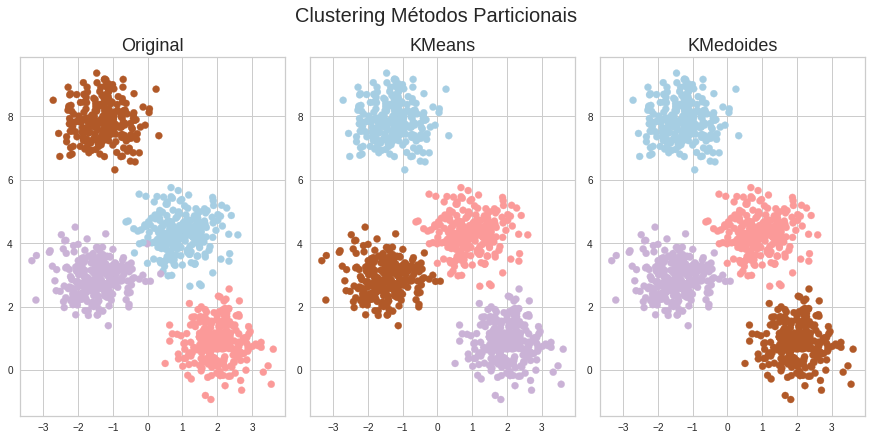

In [ ]:
n_clusters = 4
titles = ['Original', 'KMeans', 'KMedoides']

kmeans = KMeans(n_clusters=n_clusters, **parametros_kmeans).fit(X_blobs)
kmedoids = KMedoids(n_clusters=n_clusters, **parametros_kmedoids).fit(X_blobs)

fig, axs = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=True)
fig.suptitle('Clustering Métodos Particionais', fontsize = 20)

axs[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='Paired')
axs[0].set_title(titles[0], fontsize = 18)
axs[0].grid(True)

axs[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmeans.labels_, cmap='Paired')
axs[1].set_title(titles[1], fontsize = 18)
axs[1].grid(True)

axs[2].scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmedoids.labels_, cmap='Paired')
axs[2].set_title(titles[2], fontsize = 18)
axs[2].grid(True)

plt.show()

# Métodos Hierárquicos

In [ ]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


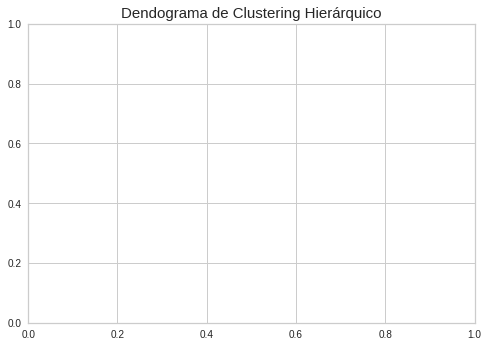

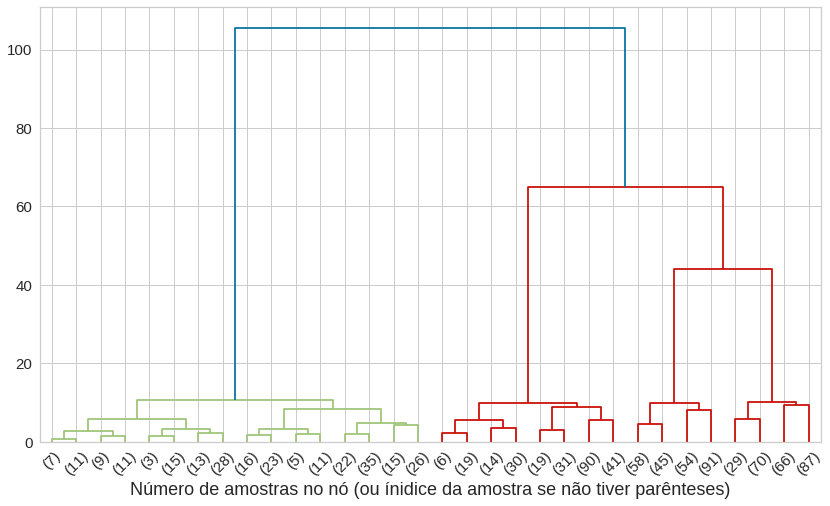

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_blobs)
plt.title('Dendograma de Clustering Hierárquico', fontsize=15)
plt.figure(figsize=(14, 8))
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Número de amostras no nó (ou ínidice da amostra se não tiver parênteses)", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
n_clusters = 4

complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete').fit(X_blobs)
average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average').fit(X_blobs)
single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single').fit(X_blobs)

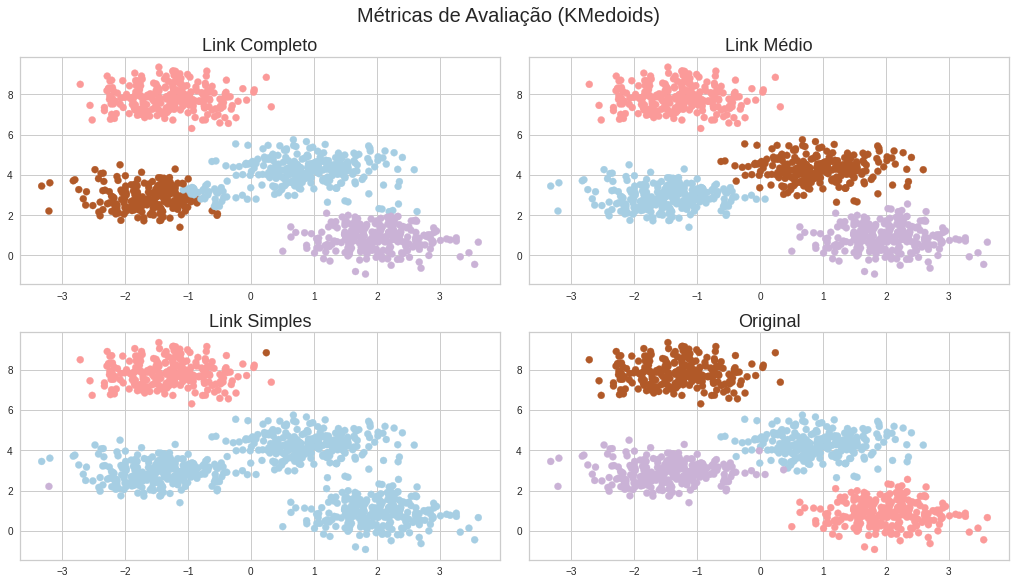

In [ ]:
num_figs = 3
titles = ['Link Completo', 'Link Médio', 'Link Simples', 'Original']

fig, axs = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
fig.suptitle(subtitles, fontsize = 20)

axs[0][0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=complete.labels_, cmap='Paired')
axs[0][0].set_title(titles[0], fontsize = 18)
axs[0][0].grid(True)

axs[0][1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=average.labels_, cmap='Paired')
axs[0][1].set_title(titles[1], fontsize = 18)
axs[0][1].grid(True)

axs[1][0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=single.labels_, cmap='Paired')
axs[1][0].set_title(titles[2], fontsize = 18)
axs[1][0].grid(True)

axs[1][1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='Paired')
axs[1][1].set_title(titles[3], fontsize = 18)
axs[1][1].grid(True)

plt.show()

# Agora é a sua vez!

Compare a capacidade de agrupamento dos métodos acima nos seguintes conjuntos de dados:

### Meia Luas

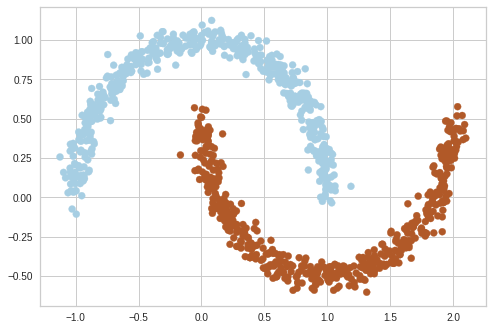

In [ ]:
n_samples = 1000
X_moons, y_moons = make_moons(n_samples=n_samples, noise=.05)
X_moons = X_moons[:,:2]

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='Paired')
plt.show()

# Esse modelo de clusterização permite a maquina utilizar de aprendizados para criar novas formas de classificação e observação dos dados por agrupamento utilizando o algoritimo evolucionario do k-means, ao qual permite por analise avaliar melhor o desempenho do modelo para mensurar melhores propostas de trabalho. As coordenadas cartesianas do grafico entre os pontos localizadas na região observada em forma de nois aneis de meia-lua apresentam o ponto de intersecção e onde se encontram o maior problema a ser solucionado indicando o intervalos entre 0.0 e 1.0, esse conjunto indicado pela analise é o que precisa ser investicado para que possam ser utilizados algoritimos centros de clusters ou algoritimo genetico para melhorar os efetios de sobreposição dos dois grupos que ocorre no centro no anel das duas meia lua entre 0.0 e 1.0